In [1]:
#Cleaning and pre-processing the data 
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('creditcard.csv',header=0)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(df.shape)

(284807, 31)


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#Time is index tho
df.Time.tail(15) 

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

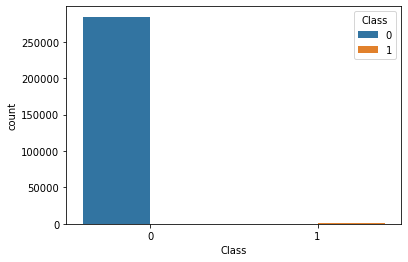

In [9]:
sns.countplot(x = df.Class, hue = df.Class)
#On seeing the result, we could see the data is highly imbalanced, where there are only 492 fraud cases outa 284k cases.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

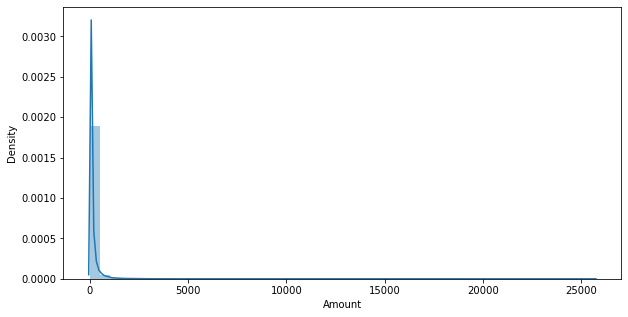

In [10]:
#Checking the distribution of amount
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [11]:
#Since the above graph is difficult to see, let's engineer a new set of bins.
df['Amount-Bins'] = ''

In [ ]:
def make_bins(predictor, size = 50):
    #Predictor is a df of single predictor
    #Returns bins and bin labels
    bins = np.linspace(predictor.min(), predictor.max(), num=size)
    bin_labels = []
    
    bins_last_index = bins.shape[0]-1
    
    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + 'to' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
        
    return bins, bin_labels
    

In [13]:
bins, bin_labels = make_bins(df.Amount, size = 10)

In [14]:
df['Amount-Bins'] = pd.cut(df.Amount, bins = bins, labels = bin_labels, include_lowest = True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0to2854
1,0to2854
2,0to2854
3,0to2854
4,0to2854


In [15]:
df['Amount-Bins'].value_counts()

0to2854         284484
2854to5709         285
5709to8563          28
8563to11418          4
11418to14272         3
17127to19982         2
22836to25691         1
19982to22836         0
14272to17127         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0to2854'),
  Text(1, 0, '2854to5709'),
  Text(2, 0, '5709to8563'),
  Text(3, 0, '8563to11418'),
  Text(4, 0, '11418to14272'),
  Text(5, 0, '14272to17127'),
  Text(6, 0, '17127to19982'),
  Text(7, 0, '19982to22836'),
  Text(8, 0, '22836to25691')])

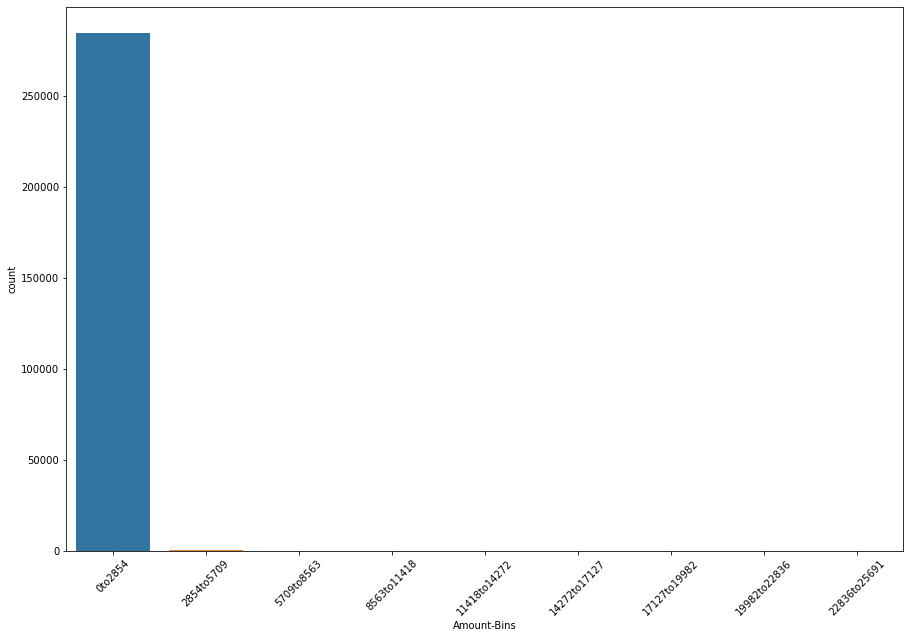

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'Amount-Bins', data = df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0to2854'),
  Text(1, 0, '2854to5709'),
  Text(2, 0, '5709to8563'),
  Text(3, 0, '8563to11418'),
  Text(4, 0, '11418to14272'),
  Text(5, 0, '14272to17127'),
  Text(6, 0, '17127to19982'),
  Text(7, 0, '19982to22836'),
  Text(8, 0, '22836to25691')])

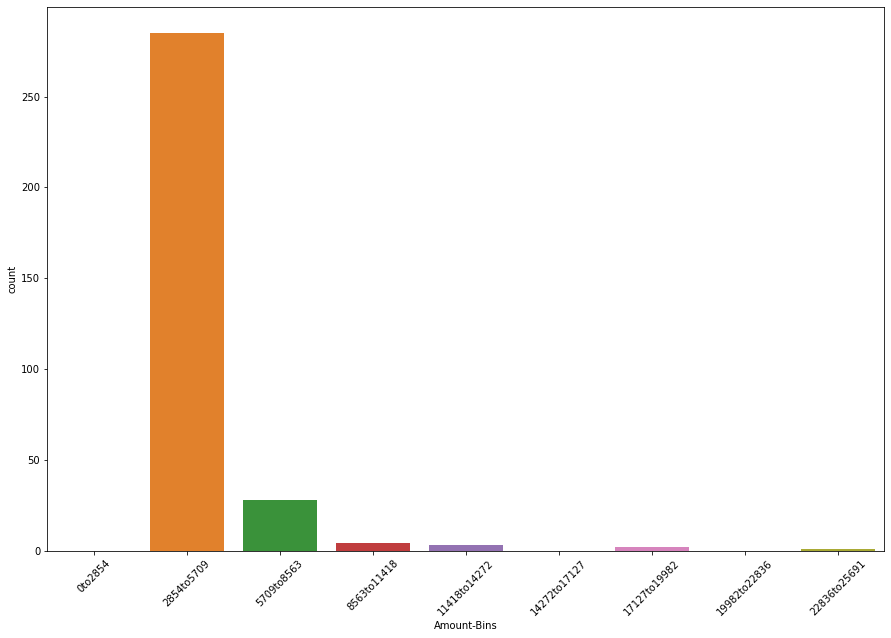

In [17]:
#To see the values of other bins, let's eliminate the first bin
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Amount-Bins', data = df[~(df['Amount-Bins'] == '0to2854')])
plt.xticks(rotation = 45)

In [18]:
df_encoded = pd.get_dummies(data = df, columns = ['Amount-Bins'])
df = df_encoded.copy()
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...  Class  Amount-Bins_0to2854  \
0  0.098698  0.363787  ...      0                    1   
1  0.085102 -0.255425  ...      0                    1   
2  0.247676 -1.514654  ...      0                    1   
3  0.377436 -1.387024  ...      0                    1   
4 -0.270533  0.817739  ...      0                    1   

   Amount-Bins_2854to5709  Amount-Bins_5709to8563  Amount-Bins_8563to11418  \
0                       0                       0                        0   
1       

In [36]:
#Shuffling into test/train 

dataset_in_np = df.values
np.random.seed(0)
np.random.shuffle(dataset_in_np)

train_size = int(0.9 * dataset_in_np.shape[0])
train_features = dataset_in_np[:train_size, :-1]
train_labels = dataset_in_np[:train_size, -1]
test_features = dataset_in_np[train_size:, :-1]
test_labels = dataset_in_np[train_size:, -1]

In [37]:
#Uploading to S3
import io
import sagemaker.amazon.common as smac

print('train_features shape = ', train_features.shape)
print('train_labels shape = ', train_labels.shape)

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, train_features, train_labels)
buf.seek(0)

train_features shape =  (256326, 39)
train_labels shape =  (256326,)


0

In [38]:
import boto3
import os

bucket = 'creditcardfrauddetection-s3bucket'
prefix = 'creditCardFraudDetectionUsingKNN'
key = 'recordio-pb-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://creditcardfrauddetection-s3bucket/creditCardFraudDetectionUsingKNN/train/recordio-pb-data


In [39]:
print('test_features shape = ', test_features.shape)
print('test_labels shape = ', test_labels.shape)

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, test_features, test_labels)
buf.seek(0)

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded test data location: {}'.format(s3_test_data))

test_features shape =  (28481, 39)
test_labels shape =  (28481,)
uploaded test data location: s3://creditcardfrauddetection-s3bucket/creditCardFraudDetectionUsingKNN/test/recordio-pb-data


In [40]:
import matplotlib.pyplot as plt

import sagemaker
from sagemaker import get_execution_role
from sagemaker.predictor import csv_serializer, json_deserializer


def trained_estimator_from_hyperparams(s3_train_data, hyperparams, output_path, s3_test_data=None):
    """
    Create an Estimator from the given hyperparams, fit to training data, 
    and return a deployed predictor
    
    """
    # specify algorithm containers. These contain the code for the training job
    containers = {
        'us-west-2': '174872318107.dkr.ecr.us-west-2.amazonaws.com/knn:1',
        'us-east-1': '382416733822.dkr.ecr.us-east-1.amazonaws.com/knn:1',
        'us-east-2': '404615174143.dkr.ecr.us-east-2.amazonaws.com/knn:1',
        'eu-west-1': '438346466558.dkr.ecr.eu-west-1.amazonaws.com/knn:1',
        'ap-northeast-1': '351501993468.dkr.ecr.ap-northeast-1.amazonaws.com/knn:1',
        'ap-northeast-2': '835164637446.dkr.ecr.ap-northeast-2.amazonaws.com/knn:1',
        'ap-southeast-2': '712309505854.dkr.ecr.ap-southeast-2.amazonaws.com/knn:1'
    }
    # set up the estimator
    knn = sagemaker.estimator.Estimator(containers[boto3.Session().region_name],
        get_execution_role(),
        train_instance_count=1,
        train_instance_type='ml.m5.2xlarge',
        output_path=output_path,
        sagemaker_session=sagemaker.Session())
    knn.set_hyperparameters(**hyperparams)
    
    # train a model. fit_input contains the locations of the train and test data
    fit_input = {'train': s3_train_data}
    if s3_test_data is not None:
        fit_input['test'] = s3_test_data
    knn.fit(fit_input)
    return knn

In [42]:
hyperparams = {
    'feature_dim': 39,
    'k': 10,
    'sample_size': 256326,
    'predictor_type': 'classifier' 
}
output_path = 's3://' + bucket + '/' + prefix + '/default_example/output'
knn_estimator = trained_estimator_from_hyperparams(s3_train_data, hyperparams, output_path, 
                                                   s3_test_data=s3_test_data)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-07-11 22:20:13 Starting - Starting the training job...
2021-07-11 22:20:15 Starting - Launching requested ML instancesProfilerReport-1626042013: InProgress
...
2021-07-11 22:21:03 Starting - Preparing the instances for training............
2021-07-11 22:23:02 Downloading - Downloading input data
2021-07-11 22:23:02 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/11/2021 22:23:52 INFO 139961314342720] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'_kvstore': 'dist_async', '_log_level': 'info', '_num_gpus': 'auto', '_num_kv_servers': '1', '_tuning_objective_metric': '', '_faiss_index_nprobe': '5', 'epochs': '1', 'feature_dim': 'auto', 'faiss_index_ivf_nlists': 'auto', 'index_metric': 'L2', 'index_type': 'faiss.Flat', 'mini_batch_size': '5000', '_enable_profiler': 'false'}
[07/11/2021 22:23:52 INFO 139961314342720] Me

In [43]:
def predictor_from_estimator(knn_estimator, estimator_name, instance_type, endpoint_name=None): 
    knn_predictor = knn_estimator.deploy(initial_instance_count=1, instance_type=instance_type,
                                        endpoint_name=endpoint_name)
    knn_predictor.content_type = 'text/csv'
    knn_predictor.serializer = csv_serializer
    knn_predictor.deserializer = json_deserializer
    return knn_predictor

In [ ]:
import time

instance_type = 'ml.m4.xlarge'
model_name = 'knn_%s'% instance_type
endpoint_name = 'knn-ml-m4-xlarge-%s'% (str(time.time()).replace('.','-'))
print('setting up the endpoint..')
predictor = predictor_from_estimator(knn_estimator, model_name, instance_type, endpoint_name=endpoint_name)

In [ ]:
batches = np.array_split(test_features, 100)
print('data split into 100 batches, of size %d.' % batches[0].shape[0])

# obtain an np array with the predictions for the entire test set
start_time = time.time()
predictions = []
for batch in batches:
    result = predictor.predict(batch)
    cur_predictions = np.array([result['predictions'][i]['predicted_label'] for i in range(len(result['predictions']))])
    predictions.append(cur_predictions)
predictions = np.concatenate(predictions)
run_time = time.time() - start_time

test_size = test_labels.shape[0]
num_correct = sum(predictions == test_labels)
accuracy = num_correct / float(test_size)
print('time required for predicting %d data point: %.2f seconds' % (test_size, run_time))
print('accuracy of model: %.1f%%' % (accuracy * 100) )